# Modules

In [1]:
import json
from glob import glob
from io import StringIO

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from proj.conf import abstract, introduction
from proj.promptfoo import read_results

# Get list of outputs for each model

In [2]:
INPUT_DIR = introduction.CASES / "phenoplier" / "outputs"
assert INPUT_DIR.exists
display(INPUT_DIR)

PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/introduction/cases/phenoplier/outputs')

In [3]:
INPUT_MODELS = sorted(list(INPUT_DIR.glob("*")))

In [4]:
INPUT_MODELS

[PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/introduction/cases/phenoplier/outputs/claude-3-haiku-20240307'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/introduction/cases/phenoplier/outputs/claude-3-opus-20240229'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/introduction/cases/phenoplier/outputs/claude-3-sonnet-20240229'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/introduction/cases/phenoplier/outputs/gemma-2b-instruct-fp16'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/introduction/cases/phenoplier/outputs/gpt-3.5-turbo-0125'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/introduction/cases/phenoplier/outputs/gpt-4-0613'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/introduction/cases/phenoplier/outputs/gpt-4-turbo-2024-04-09'),
 PosixPath('/home/miltondp/projects/othe

# Read all results

In [5]:
results = []
for model in INPUT_MODELS:
    try:
        model_results = read_results(model)
        results.append(model_results)
    except:
        print(f"Failed: {model}")

In [6]:
len(results)

16

In [7]:
results = pd.concat(results, ignore_index=True)

In [8]:
results.shape

(6960, 10)

In [9]:
results.head()

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, introduct...",Formatting


In [10]:
results["model"].value_counts()

model
claude-3-haiku-20240307             435
claude-3-opus-20240229              435
claude-3-sonnet-20240229            435
gemma-2b-instruct-fp16              435
gpt-3.5-turbo-0125                  435
gpt-4-0613                          435
gpt-4-turbo-2024-04-09              435
llama2-7b-chat-fp16                 435
llama3-70b-instruct-q5_1            435
llama3-8b-instruct-fp16             435
mistral-7b-instruct-fp16            435
mistral-7b-instruct-v0.2-fp16       435
mixtral-8x22b-instruct-v0.1-q5_1    435
mixtral-8x7b-instruct-v0.1-q8_0     435
starling-lm-7b-alpha-fp16           435
starling-lm-7b-beta-fp16            435
Name: count, dtype: int64

In [11]:
results["prompt"].value_counts()

prompt
baseline                   2320
candidate_with_metadata    2320
candidate                  2320
Name: count, dtype: int64

In [12]:
results["test_description"].value_counts()

test_description
Keeps most references to other articles and doesn't make them up    1920
Has no spelling errors                                              1680
starts with context                                                 1680
ends with conclusion                                                1680
Name: count, dtype: int64

In [13]:
results["comp_type"].value_counts()

comp_type
Formatting              5760
Information accuracy     480
Structure                480
Spelling/grammar         240
Name: count, dtype: int64

In [14]:
results["comp_desc"].value_counts()

comp_desc
Starts with capital letter                                960
Ends with a period                                        960
Is a single paragraph                                     960
Doesn't include manuscript title                          960
Doesn't reference authors, keywords, introduction, etc    960
Has roughly the same length as input                      960
Has no spelling errors                                    240
Keeps most references to other articles                   240
Does not make up references to other articles             240
Starts with context                                       240
Ends with conclusion                                      240
Name: count, dtype: int64

# Plot: pass rate

In [15]:
results.groupby(["model", "prompt"]).count()

passed  score_avg  \
model                            prompt                                       
claude-3-haiku-20240307          baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
claude-3-opus-20240229           baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
claude-3-sonnet-20240229         baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
gemma-2b-instruct-fp16           baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
gpt-3.5-turbo-0125               baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
gpt-4-0613                       baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
gpt-4-turbo-2024-04-09           baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
llama2-7b-chat-fp16              baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
llama3-70b-instruct-q5_1         baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
llama3-8b-instruct-fp16          baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
mistral-7b-instruct-fp16         baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
mistral-7b-instruct-v0.2-fp16    baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
mixtral-8x22b-instruct-v0.1-q5_1 baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
mixtral-8x7b-instruct-v0.1-q8_0  baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
starling-lm-7b-alpha-fp16        baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
starling-lm-7b-beta-fp16         baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   

                                                          test_description  \
model                        

## Prompt: `candidate_with_metadata`

In [16]:
pass_rate = (
    results[results["prompt"].isin(("candidate_with_metadata",))]
    .groupby(["model"])["passed"]
    .sum()
    .to_frame()
)

In [17]:
pass_rate = pass_rate.assign(pass_rate=lambda x: x / 145.0)

In [18]:
pass_rate.shape

(16, 2)

In [19]:
pass_rate.head()

,passed,pass_rate
model,,
claude-3-haiku-20240307,0,0.000000
claude-3-opus-20240229,101,0.696552
claude-3-sonnet-20240229,0,0.000000
gemma-2b-instruct-fp16,0,0.000000
gpt-3.5-turbo-0125,35,0.241379


In [20]:
pass_rate.sort_values("pass_rate")

,passed,pass_rate
model,,
claude-3-haiku-20240307,0,0.000000
claude-3-sonnet-20240229,0,0.000000
gemma-2b-instruct-fp16,0,0.000000
llama3-70b-instruct-q5_1,0,0.000000
llama3-8b-instruct-fp16,0,0.000000
mistral-7b-instruct-v0.2-fp16,0,0.000000
starling-lm-7b-beta-fp16,7,0.048276
mistral-7b-instruct-fp16,14,0.096552
mixtral-8x7b-instruct-v0.1-q8_0,14,0.096552


In [21]:
sorted_models = (
    pass_rate.sort_values("pass_rate").index.get_level_values("model").tolist()
)

In [22]:
sorted_models[-5:]

['starling-lm-7b-alpha-fp16',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'mixtral-8x22b-instruct-v0.1-q5_1',
 'gpt-4-turbo-2024-04-09']

In [23]:
# sorted_models = list(dict.fromkeys(sorted_models))

In [24]:
# sorted_models[-5:]

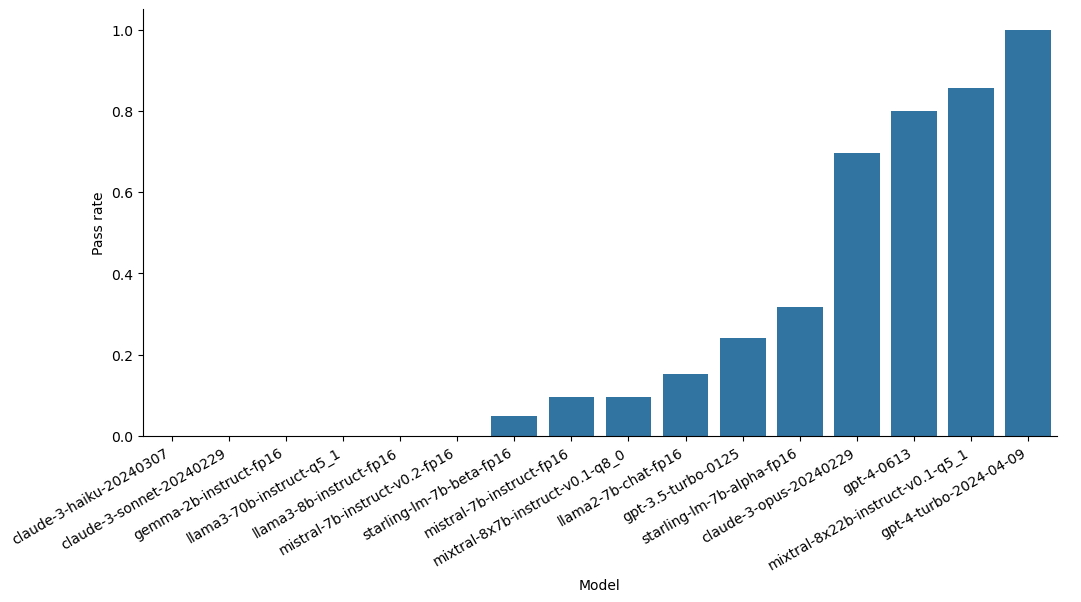

In [25]:
g = sns.catplot(
    data=pass_rate,
    x="model",
    y="pass_rate",
    # hue="prompt",
    kind="bar",
    order=sorted_models,
    errorbar=None,
    aspect=2,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Pass rate")

## Prompt: `candidate`

In [26]:
pass_rate = (
    results[results["prompt"].isin(("candidate",))]
    .groupby(["model"])["passed"]
    .sum()
    .to_frame()
)

In [27]:
pass_rate = pass_rate.assign(pass_rate=lambda x: x / 140.0)

In [28]:
pass_rate.shape

(16, 2)

In [29]:
pass_rate.head()

,passed,pass_rate
model,,
claude-3-haiku-20240307,0,0.000000
claude-3-opus-20240229,145,1.035714
claude-3-sonnet-20240229,0,0.000000
gemma-2b-instruct-fp16,0,0.000000
gpt-3.5-turbo-0125,86,0.614286


In [30]:
pass_rate.sort_values("pass_rate")

,passed,pass_rate
model,,
claude-3-haiku-20240307,0,0.000000
claude-3-sonnet-20240229,0,0.000000
gemma-2b-instruct-fp16,0,0.000000
llama3-70b-instruct-q5_1,0,0.000000
llama3-8b-instruct-fp16,0,0.000000
mistral-7b-instruct-v0.2-fp16,0,0.000000
starling-lm-7b-beta-fp16,7,0.050000
mixtral-8x7b-instruct-v0.1-q8_0,14,0.100000
llama2-7b-chat-fp16,15,0.107143


In [31]:
sorted_models = (
    pass_rate.sort_values("pass_rate").index.get_level_values("model").tolist()
)

In [32]:
sorted_models[-5:]

['starling-lm-7b-alpha-fp16',
 'gpt-4-turbo-2024-04-09',
 'mixtral-8x22b-instruct-v0.1-q5_1',
 'claude-3-opus-20240229',
 'gpt-4-0613']

In [33]:
# sorted_models = list(dict.fromkeys(sorted_models))

In [34]:
# sorted_models[-5:]

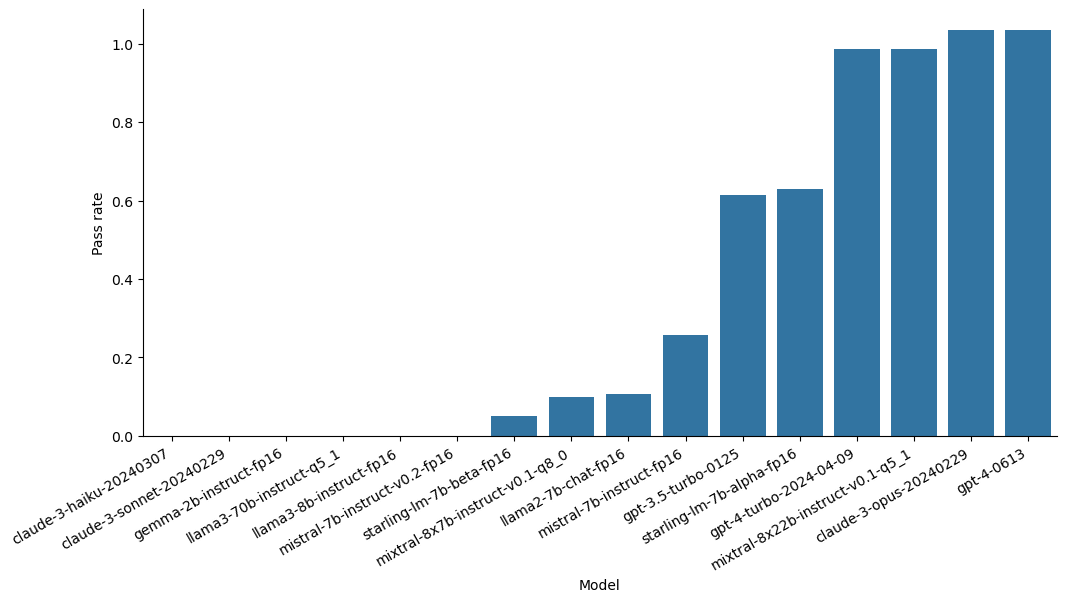

In [35]:
g = sns.catplot(
    data=pass_rate,
    x="model",
    y="pass_rate",
    # hue="prompt",
    kind="bar",
    order=sorted_models,
    errorbar=None,
    aspect=2,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Pass rate")

# Plot: pass rate by prompt

In [36]:
results

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, introduct...",Formatting
...,...,...,...,...,...,...,...,...,...,...
6955,starling-lm-7b-beta-fp16,False,0.428571,candidate,ends with conclusion,False,0.00,Failed,Is a single paragraph,Formatting
6956,starling-lm-7b-beta-fp16,False,0.428571,candidate,ends with conclusion,True,0.25,Passed,Doesn't include manuscript title,Formatting
6957,starling-lm-7b-beta-fp16,False,0.428571,candidate,ends with conclusion,True,0.25,Passed,"Doesn't reference authors, keywords, introduct...",Formatting
6958,starling-lm-7b-beta-fp16,False,0.428571,candidate,ends with conclusion,False,0.00,Failed,Has roughly the same length as input,Formatting


In [37]:
results.groupby(["model", "prompt"]).count()

passed  score_avg  \
model                            prompt                                       
claude-3-haiku-20240307          baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
claude-3-opus-20240229           baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
claude-3-sonnet-20240229         baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
gemma-2b-instruct-fp16           baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
gpt-3.5-turbo-0125               baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
gpt-4-0613                       baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
gpt-4-turbo-2024-04-09           baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
llama2-7b-chat-fp16              baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
llama3-70b-instruct-q5_1         baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
llama3-8b-instruct-fp16          baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
mistral-7b-instruct-fp16         baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
mistral-7b-instruct-v0.2-fp16    baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
mixtral-8x22b-instruct-v0.1-q5_1 baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
mixtral-8x7b-instruct-v0.1-q8_0  baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
starling-lm-7b-alpha-fp16        baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   
starling-lm-7b-beta-fp16         baseline                    145        145   
                                 candidate                   145        145   
                                 candidate_with_metadata     145        145   

                                                          test_description  \
model                        

In [38]:
pass_rate = (
    results[results["prompt"] != "baseline"]
    .groupby(["model", "prompt"])["passed"]
    .sum()
    .to_frame()
)

In [39]:
pass_rate = pass_rate.assign(pass_rate=lambda x: x / 140.0).reset_index()

In [40]:
pass_rate.shape

(32, 4)

In [41]:
pass_rate.head()

,model,prompt,passed,pass_rate
0,claude-3-haiku-20240307,candidate,0,0.000000
1,claude-3-haiku-20240307,candidate_with_metadata,0,0.000000
2,claude-3-opus-20240229,candidate,145,1.035714
3,claude-3-opus-20240229,candidate_with_metadata,101,0.721429
4,claude-3-sonnet-20240229,candidate,0,0.000000


In [42]:
pass_rate.sort_values("pass_rate")

,model,prompt,passed,pass_rate
0,claude-3-haiku-20240307,candidate,0,0.000000
1,claude-3-haiku-20240307,candidate_with_metadata,0,0.000000
23,mistral-7b-instruct-v0.2-fp16,candidate_with_metadata,0,0.000000
22,mistral-7b-instruct-v0.2-fp16,candidate,0,0.000000
4,claude-3-sonnet-20240229,candidate,0,0.000000
5,claude-3-sonnet-20240229,candidate_with_metadata,0,0.000000
6,gemma-2b-instruct-fp16,candidate,0,0.000000
7,gemma-2b-instruct-fp16,candidate_with_metadata,0,0.000000
19,llama3-8b-instruct-fp16,candidate_with_metadata,0,0.000000
18,llama3-8b-instruct-fp16,candidate,0,0.000000


In [43]:
sorted_models = (
    pass_rate[pass_rate["prompt"] == "candidate_with_metadata"]
    .sort_values("pass_rate")["model"]
    .tolist()
)

In [44]:
sorted_models[-5:]

['starling-lm-7b-alpha-fp16',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'mixtral-8x22b-instruct-v0.1-q5_1',
 'gpt-4-turbo-2024-04-09']

In [45]:
# sorted_models = list(dict.fromkeys(sorted_models))

In [46]:
# sorted_models[-5:]

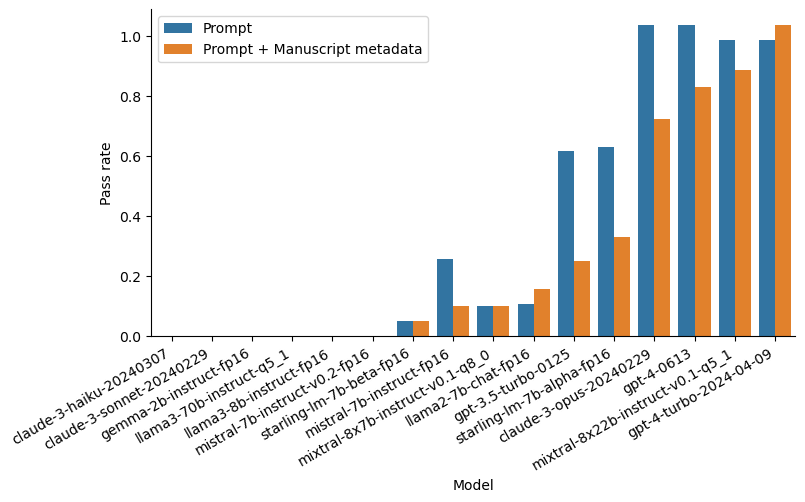

In [47]:
g = sns.catplot(
    data=pass_rate,
    x="model",
    y="pass_rate",
    hue="prompt",
    kind="bar",
    order=sorted_models,
    errorbar=None,
    height=4,
    aspect=2,
    legend_out=False,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Pass rate")

leg = g.axes.flat[0].get_legend()
leg.set_title("")
new_labels = ["Prompt", "Prompt + Manuscript metadata"]
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

In [48]:
leg = g.axes.flat[0].get_legend()

In [49]:
leg.get_title()

Text(0, 0, '')

# Plot: pass rate by test_description

In [50]:
results

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, introduct...",Formatting
...,...,...,...,...,...,...,...,...,...,...
6955,starling-lm-7b-beta-fp16,False,0.428571,candidate,ends with conclusion,False,0.00,Failed,Is a single paragraph,Formatting
6956,starling-lm-7b-beta-fp16,False,0.428571,candidate,ends with conclusion,True,0.25,Passed,Doesn't include manuscript title,Formatting
6957,starling-lm-7b-beta-fp16,False,0.428571,candidate,ends with conclusion,True,0.25,Passed,"Doesn't reference authors, keywords, introduct...",Formatting
6958,starling-lm-7b-beta-fp16,False,0.428571,candidate,ends with conclusion,False,0.00,Failed,Has roughly the same length as input,Formatting


In [51]:
results.groupby(["model", "prompt", "test_description"]).count()

passed  \
model                    prompt                  test_description                                             
claude-3-haiku-20240307  baseline                Has no spelling errors                                  35   
                                                 Keeps most references to other articles and doe...      40   
                                                 ends with conclusion                                    35   
                                                 starts with context                                     35   
                         candidate               Has no spelling errors                                  35   
...                                                                                                     ...   
starling-lm-7b-beta-fp16 candidate               starts with context                                     35   
                         candidate_with_metadata Has no spelling errors                                  35   
                                                 Keeps most references to other articles and doe...      40   
                                                 ends with conclusion                                    35   
                                                 starts with context                                     35   

                                                                                                     score_avg  \
model                    prompt                  test_description                                                
claude-3-haiku-20240307  baseline                Has no spelling errors                                     35   
                                                 Keeps most references to other articles and doe...         40   
                                                 ends with conclusion                                       35   
                                                 starts with context                                        35   
                         candidate               Has no spelling errors                                     35   
...                                                                                                        ...   
starling-lm-7b-beta-fp16 candidate               starts with context                                        35   
                         candidate_with_metadata Has no spelling errors                                     35   
                                                 Keeps most references to other articles and doe...         40   
                                                 ends with conclusion                                       35   
                                                 starts with context                                        35   

                                                                                                     comp_pass  \
model                    prompt                  test_description                                                
claude-3-haiku-20240307  baseline                Has no spelling errors                                     35   
                                                 Keeps most references to other articles and doe...         40   
                                                 ends with conclusion                                       35   
                                                 starts with context                                        35   
                         candidate               Has no spelling errors                                     35   
...                                                                                                        ...   
starling-lm-7b-beta-fp16 candidate               starts with context                                        35   
                         candidate_with_metadata Has no spelling errors                                     35   
                                  

## Prompt: `candidate_with_metadata`

In [52]:
pass_rate = (
    results[results["prompt"].isin(("candidate_with_metadata",))]
    .groupby(["model", "test_description"])["passed"]
    .sum()
    .to_frame()
)

In [53]:
pass_rate = pass_rate.assign(pass_rate=lambda x: x / 35.0)

In [54]:
pass_rate.shape

(64, 2)

In [55]:
pass_rate.head()

passed  \
model                   test_description                                             
claude-3-haiku-20240307 Has no spelling errors                                   0   
                        Keeps most references to other articles and doe...       0   
                        ends with conclusion                                     0   
                        starts with context                                      0   
claude-3-opus-20240229  Has no spelling errors                                  14   

                                                                            pass_rate  
model                   test_description                                               
claude-3-haiku-20240307 Has no spelling errors                                    0.0  
                        Keeps most references to other articles and doe...        0.0  
                        ends with conclusion                                      0.0  
                        starts with context                                       0.0  
claude-3-opus-20240229  Has no spelling errors                                    0.4

In [56]:
pass_rate.sort_values("pass_rate")

passed  \
model                            test_description                                             
claude-3-haiku-20240307          Has no spelling errors                                   0   
llama3-70b-instruct-q5_1         Has no spelling errors                                   0   
                                 Keeps most references to other articles and doe...       0   
                                 ends with conclusion                                     0   
                                 starts with context                                      0   
...                                                                                     ...   
gpt-4-turbo-2024-04-09           ends with conclusion                                    35   
                                 Has no spelling errors                                  35   
gpt-3.5-turbo-0125               Has no spelling errors                                  35   
gpt-4-turbo-2024-04-09           Keeps most references to other articles and doe...      40   
mixtral-8x22b-instruct-v0.1-q5_1 Keeps most references to other articles and doe...      40   

                                                                                     pass_rate  
model                            test_description                                               
claude-3-haiku-20240307          Has no spelling errors                               0.000000  
llama3-70b-instruct-q5_1         Has no spelling errors                               0.000000  
                                 Keeps most references to other articles and doe...   0.000000  
                                 ends with conclusion                                 0.000000  
                                 starts with context                                  0.000000  
...                                                                                        ...  
gpt-4-turbo-2024-04-09           ends with conclusion                                 1.000000  
                                 Has no spelling errors                               1.000000  
gpt-3.5-turbo-0125               Has no spelling errors                               1.000000  
gpt-4-turbo-2024-04-09           Keeps most references to other articles and doe...   1.142857  
mixtral-8x22b-instruct-v0.1-q5_1 Keeps most references to other articles and doe...   1.142857  

[64 rows x 2 columns]

In [57]:
sorted_models = (
    pass_rate.sort_values("pass_rate").index.get_level_values("model").tolist()
)

In [58]:
sorted_models[-5:]

['gpt-4-turbo-2024-04-09',
 'gpt-4-turbo-2024-04-09',
 'gpt-3.5-turbo-0125',
 'gpt-4-turbo-2024-04-09',
 'mixtral-8x22b-instruct-v0.1-q5_1']

In [59]:
sorted_models = list(dict.fromkeys(sorted_models))

In [60]:
sorted_models[-5:]

['gpt-3.5-turbo-0125',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'mixtral-8x22b-instruct-v0.1-q5_1',
 'gpt-4-turbo-2024-04-09']

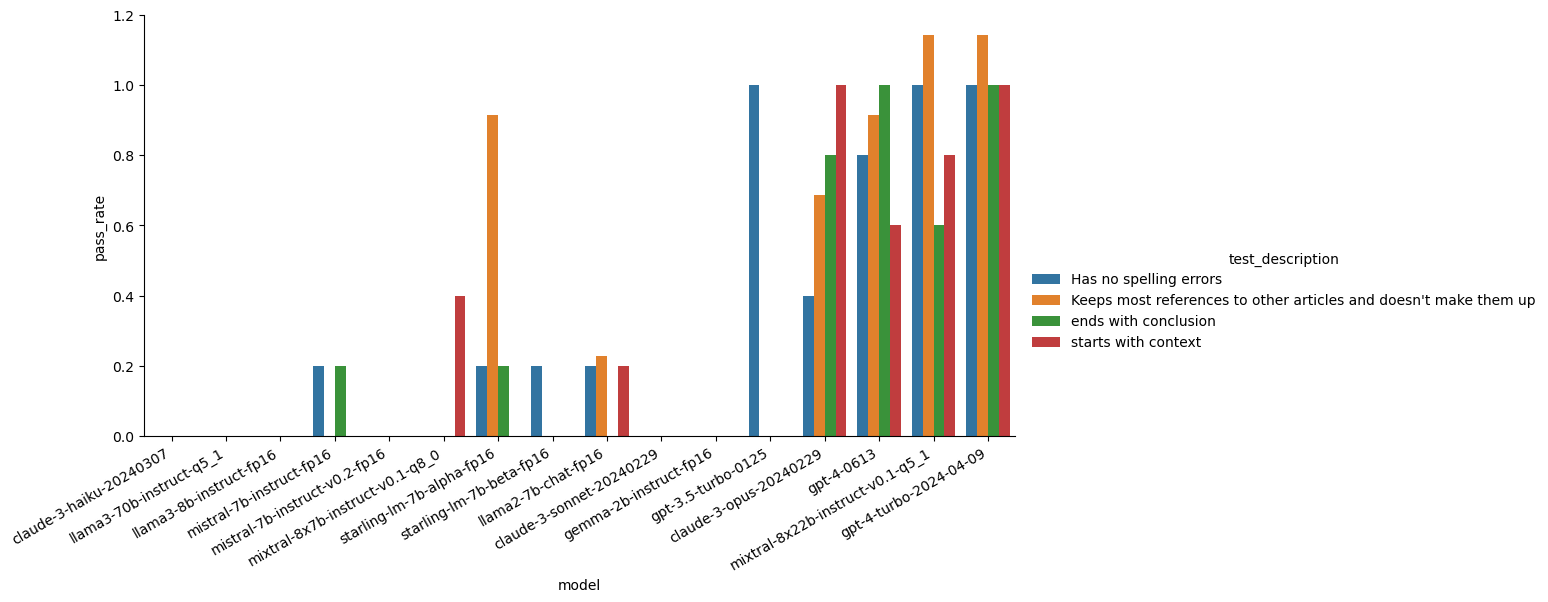

In [61]:
g = sns.catplot(
    data=pass_rate,
    x="model",
    y="pass_rate",
    hue="test_description",
    kind="bar",
    order=sorted_models,
    errorbar=None,
    aspect=2,
)
g.set_xticklabels(rotation=30, ha="right")

# Plot: score

In [62]:
results

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, introduct...",Formatting
...,...,...,...,...,...,...,...,...,...,...
6955,starling-lm-7b-beta-fp16,False,0.428571,candidate,ends with conclusion,False,0.00,Failed,Is a single paragraph,Formatting
6956,starling-lm-7b-beta-fp16,False,0.428571,candidate,ends with conclusion,True,0.25,Passed,Doesn't include manuscript title,Formatting
6957,starling-lm-7b-beta-fp16,False,0.428571,candidate,ends with conclusion,True,0.25,Passed,"Doesn't reference authors, keywords, introduct...",Formatting
6958,starling-lm-7b-beta-fp16,False,0.428571,candidate,ends with conclusion,False,0.00,Failed,Has roughly the same length as input,Formatting


## Prompt: `candidate_with_metadata`

In [63]:
df = results[
    results["prompt"].isin(("candidate_with_metadata",))
]  # .groupby(["model"])["score_avg"].sum().to_frame()

In [64]:
df.shape

(2320, 10)

In [65]:
df.head()

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
7,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,False,0.00,Failed,Starts with capital letter,Formatting
8,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,Ends with a period,Formatting
9,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
10,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
11,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, introduct...",Formatting


In [66]:
df.groupby("model")["score_avg"].mean().sort_values()

model
gemma-2b-instruct-fp16              0.293103
llama3-8b-instruct-fp16             0.315517
llama2-7b-chat-fp16                 0.363793
gpt-3.5-turbo-0125                  0.363793
mistral-7b-instruct-fp16            0.370690
starling-lm-7b-beta-fp16            0.391379
mistral-7b-instruct-v0.2-fp16       0.401724
llama3-70b-instruct-q5_1            0.422414
starling-lm-7b-alpha-fp16           0.434483
mixtral-8x7b-instruct-v0.1-q8_0     0.467241
claude-3-haiku-20240307             0.481034
claude-3-sonnet-20240229            0.500000
gpt-4-0613                          0.508621
mixtral-8x22b-instruct-v0.1-q5_1    0.518966
claude-3-opus-20240229              0.541379
gpt-4-turbo-2024-04-09              0.551724
Name: score_avg, dtype: float64

In [67]:
sorted_models = (
    df.groupby("model")["score_avg"]
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)

In [68]:
sorted_models[-5:]

['claude-3-sonnet-20240229',
 'gpt-4-0613',
 'mixtral-8x22b-instruct-v0.1-q5_1',
 'claude-3-opus-20240229',
 'gpt-4-turbo-2024-04-09']

In [69]:
# sorted_models = list(dict.fromkeys(sorted_models))

In [70]:
# sorted_models[-5:]

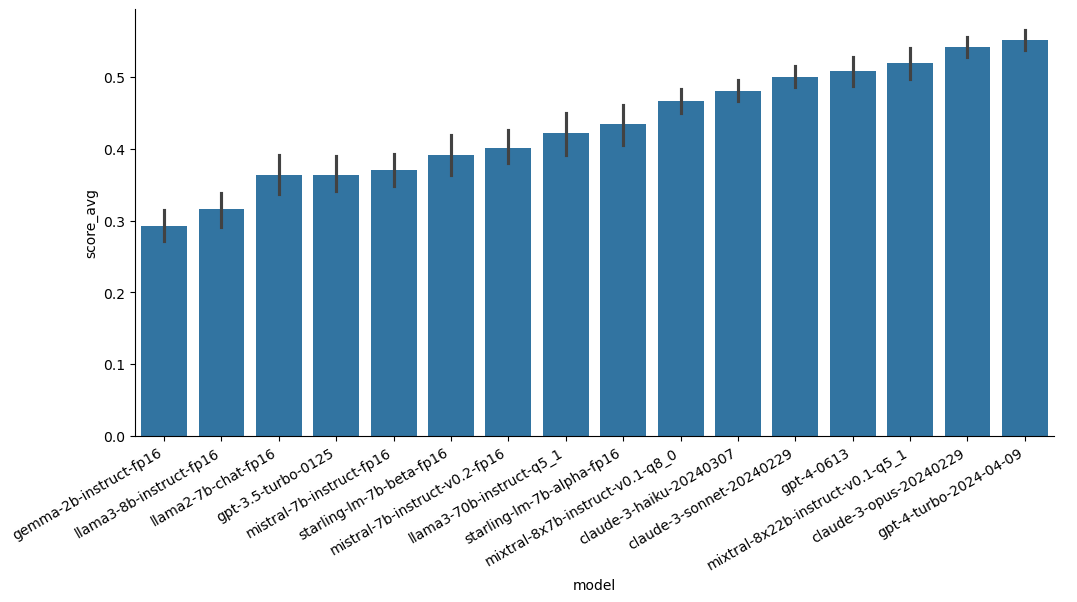

In [71]:
g = sns.catplot(
    data=df,
    x="model",
    y="score_avg",
    # hue="prompt",
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    aspect=2,
)
g.set_xticklabels(rotation=30, ha="right")

## Prompt: `candidate`

In [72]:
df = results[
    results["prompt"].isin(("candidate",))
]  # .groupby(["model"])["score_avg"].sum().to_frame()

In [73]:
df.shape

(2320, 10)

In [74]:
df.head()

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
14,claude-3-haiku-20240307,False,0.428571,candidate,Has no spelling errors,False,0.00,Failed,Starts with capital letter,Formatting
15,claude-3-haiku-20240307,False,0.428571,candidate,Has no spelling errors,True,0.25,Passed,Ends with a period,Formatting
16,claude-3-haiku-20240307,False,0.428571,candidate,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
17,claude-3-haiku-20240307,False,0.428571,candidate,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
18,claude-3-haiku-20240307,False,0.428571,candidate,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, introduct...",Formatting


In [75]:
df.groupby("model")["score_avg"].mean().sort_values()

model
llama3-8b-instruct-fp16             0.294828
gemma-2b-instruct-fp16              0.356897
llama2-7b-chat-fp16                 0.400000
starling-lm-7b-beta-fp16            0.413793
mistral-7b-instruct-fp16            0.415517
gpt-3.5-turbo-0125                  0.441379
mistral-7b-instruct-v0.2-fp16       0.451724
llama3-70b-instruct-q5_1            0.468966
mixtral-8x7b-instruct-v0.1-q8_0     0.479310
claude-3-sonnet-20240229            0.482759
claude-3-haiku-20240307             0.486207
starling-lm-7b-alpha-fp16           0.486207
mixtral-8x22b-instruct-v0.1-q5_1    0.522414
gpt-4-turbo-2024-04-09              0.550000
claude-3-opus-20240229              0.551724
gpt-4-0613                          0.551724
Name: score_avg, dtype: float64

In [76]:
sorted_models = (
    df.groupby("model")["score_avg"]
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)

In [77]:
sorted_models[-5:]

['starling-lm-7b-alpha-fp16',
 'mixtral-8x22b-instruct-v0.1-q5_1',
 'gpt-4-turbo-2024-04-09',
 'claude-3-opus-20240229',
 'gpt-4-0613']

In [78]:
# sorted_models = list(dict.fromkeys(sorted_models))

In [79]:
# sorted_models[-5:]

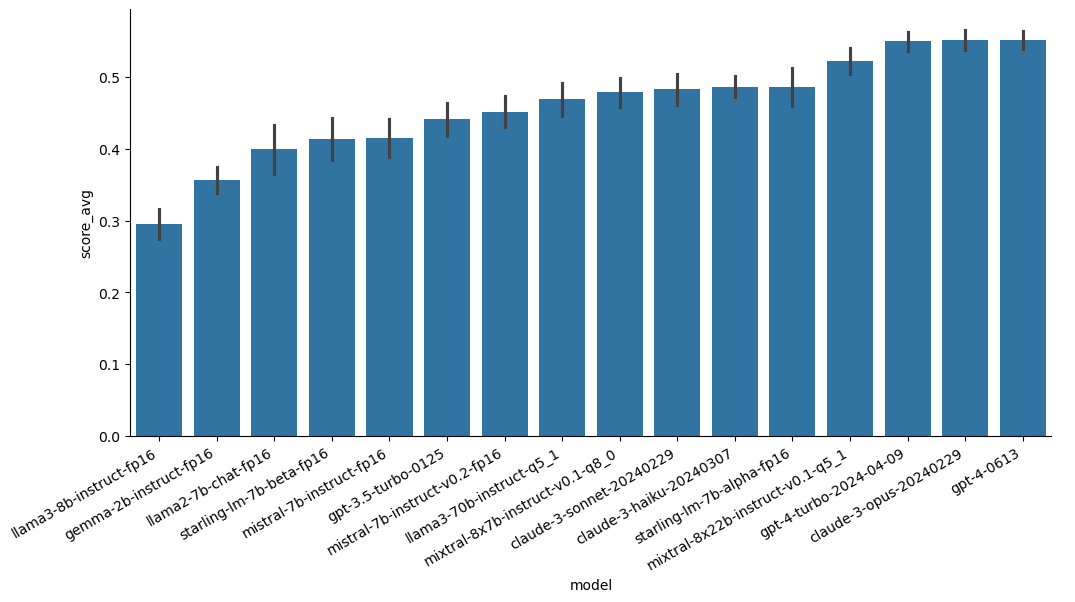

In [80]:
g = sns.catplot(
    data=df,
    x="model",
    y="score_avg",
    # hue="prompt",
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    aspect=2,
)
g.set_xticklabels(rotation=30, ha="right")

# Plot: comp_score

In [81]:
results

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, introduct...",Formatting
...,...,...,...,...,...,...,...,...,...,...
6955,starling-lm-7b-beta-fp16,False,0.428571,candidate,ends with conclusion,False,0.00,Failed,Is a single paragraph,Formatting
6956,starling-lm-7b-beta-fp16,False,0.428571,candidate,ends with conclusion,True,0.25,Passed,Doesn't include manuscript title,Formatting
6957,starling-lm-7b-beta-fp16,False,0.428571,candidate,ends with conclusion,True,0.25,Passed,"Doesn't reference authors, keywords, introduct...",Formatting
6958,starling-lm-7b-beta-fp16,False,0.428571,candidate,ends with conclusion,False,0.00,Failed,Has roughly the same length as input,Formatting


## Prompt: `candidate_with_metadata`

In [82]:
df = results[
    results["prompt"].isin(("candidate_with_metadata",))
]  # .groupby(["model"])["score_avg"].sum().to_frame()

In [83]:
df.shape

(2320, 10)

In [84]:
df.head()

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
7,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,False,0.00,Failed,Starts with capital letter,Formatting
8,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,Ends with a period,Formatting
9,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
10,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
11,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, introduct...",Formatting


In [85]:
df.groupby("model")["comp_score"].mean().sort_values()

model
gemma-2b-instruct-fp16              0.293103
llama3-8b-instruct-fp16             0.315517
gpt-3.5-turbo-0125                  0.363793
llama2-7b-chat-fp16                 0.363793
mistral-7b-instruct-fp16            0.370690
starling-lm-7b-beta-fp16            0.391379
mistral-7b-instruct-v0.2-fp16       0.401724
llama3-70b-instruct-q5_1            0.422414
starling-lm-7b-alpha-fp16           0.434483
mixtral-8x7b-instruct-v0.1-q8_0     0.467241
claude-3-haiku-20240307             0.481034
claude-3-sonnet-20240229            0.500000
gpt-4-0613                          0.508621
mixtral-8x22b-instruct-v0.1-q5_1    0.518966
claude-3-opus-20240229              0.541379
gpt-4-turbo-2024-04-09              0.551724
Name: comp_score, dtype: float64

In [86]:
sorted_models = (
    df.groupby("model")["comp_score"]
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)

In [87]:
sorted_models[-5:]

['claude-3-sonnet-20240229',
 'gpt-4-0613',
 'mixtral-8x22b-instruct-v0.1-q5_1',
 'claude-3-opus-20240229',
 'gpt-4-turbo-2024-04-09']

In [88]:
# sorted_models = list(dict.fromkeys(sorted_models))

In [89]:
df.loc[df["comp_type"] == "Formatting", "comp_score"] = (
    df.loc[df["comp_type"] == "Formatting", "comp_score"] / 0.25
)
df.loc[df["comp_type"] == "Spelling/grammar", "comp_score"] = (
    df.loc[df["comp_type"] == "Spelling/grammar", "comp_score"] / 2.0
)
df.loc[df["comp_type"] == "Structure", "comp_score"] = (
    df.loc[df["comp_type"] == "Structure", "comp_score"] / 2.0
)
df.loc[df["comp_type"] == "Information accuracy", "comp_score"] = (
    df.loc[df["comp_type"] == "Information accuracy", "comp_score"] / 2.0
)

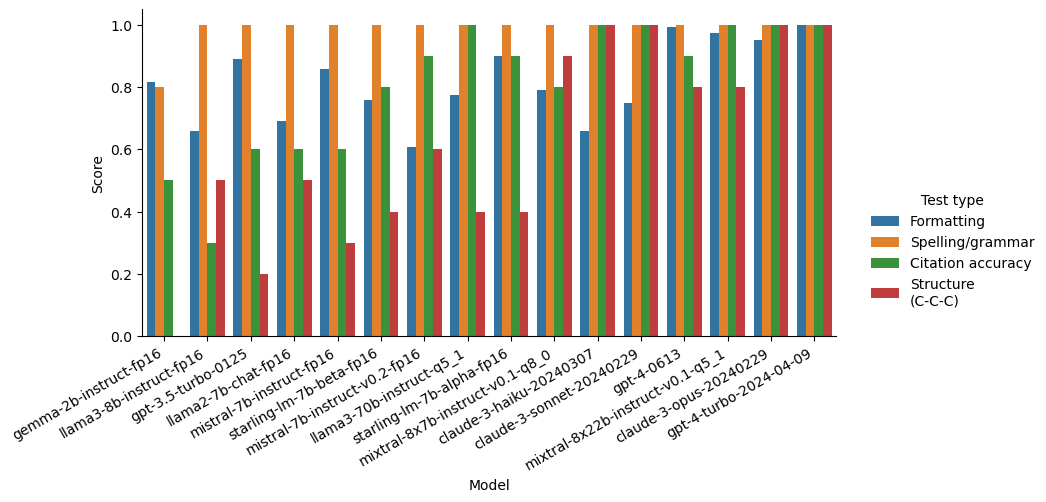

In [90]:
g = sns.catplot(
    data=df,
    x="model",
    y="comp_score",
    hue="comp_type",
    kind="bar",
    # estimator="sum",
    order=sorted_models,
    hue_order=["Formatting", "Spelling/grammar", "Information accuracy", "Structure"],
    errorbar=None,
    height=4,
    aspect=2,
    legend_out=True,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Score")

# leg = g.axes.flat[0].get_legend()
# leg.set_title("")
g._legend.set_title("Test type")
new_labels = ["Formatting", "Spelling/grammar", "Citation accuracy", "Structure\n(C-C-C)"]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

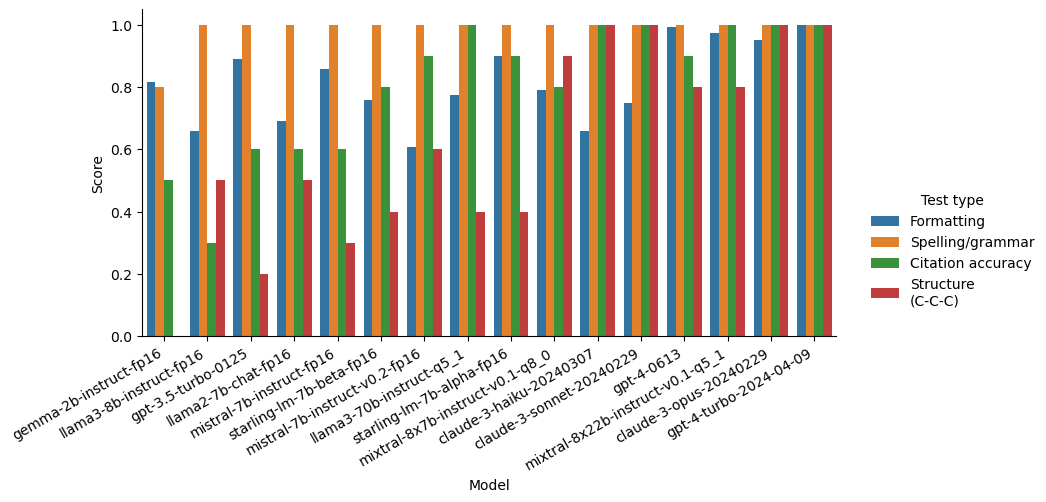

In [90]:
# this one does not include "Spelling/grammar", which has a score of 1.0 for all models.

g = sns.catplot(
    data=df,
    x="model",
    y="comp_score",
    hue="comp_type",
    kind="bar",
    # estimator="sum",
    order=sorted_models,
    hue_order=["Formatting", "Information accuracy", "Structure"],
    errorbar=None,
    height=4,
    aspect=2,
    legend_out=True,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Score")

# leg = g.axes.flat[0].get_legend()
# leg.set_title("")
g._legend.set_title("Test type")
new_labels = ["Formatting", "Citation accuracy", "Structure\n(C-C-C)"]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)